### STRIDE CLASSIFICATION DATASET, FEATURES, AND MODEL GENERATION

### Installing SensiML

In [ ]:
!pip install sensiml-dev -U

### Login into the Project

In [1]:
import pandas as pd
from sensiml import SensiML
dsk = SensiML()

/usr/local/lib/python3.7/dist-packages/sensiml/client.py:112: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.
  mgc("%config Completer.use_jedi = False")


### Sensor Data

In [2]:
dsk.project = 'Stride Classification'
dsk.project.columns()

dict_keys(['GyroscopeX', 'GyroscopeY', 'GyroscopeZ', 'AccelerometerX', 'AccelerometerY', 'AccelerometerZ'])

### Metadata

In [3]:
dsk.project.metadata_columns()

['Cont or Event', 'Type', 'Side', 'Subject', 'capture_uuid', 'segment_uuid']

### Data Samples

In [4]:
dsk.project.get_project_summary().T


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56
Capture Name,Rafael_Normal 2021-07-31 16_00_17.csv,Martin_Heel Striking 2021-07-30 08_06_42.csv,Rafael_Pronation 2021-07-31 16_13_34.csv,Rafael_Pronation 2021-07-31 16_14_27.csv,Rafael_Supination 2021-07-30 21_12_49.csv,Rafael_Over Supination 2021-07-31 16_26_03.csv,Rafael_Pronation 2021-07-28 07_28_37.csv,Rafael_Pronation 2021-07-31 16_15_03.csv,Martin_Heel Striking 2021-07-30 08_24_32.csv,Martin_Supination 2021-07-30 08_26_39.csv,Martin_Normal 2021-07-30 08_05_56.csv,Martin_Over Supination 2021-07-30 08_19_56.csv,Rafael_Over Supination 2021-07-31 16_21_42.csv,Rafael_Normal 2021-07-31 16_33_55.csv,Rafael_Over Pronation 2021-07-31 16_20_46.csv,Rafael_Supination 2021-07-31 16_12_12.csv,Rafael_Supination 2021-07-31 16_11_39.csv,Rafael_Heel Striking 2021-07-28 07_21_44.csv,Rafael_Supination 2021-07-31 16_12_52.csv,Rafael_Supination 2021-07-31 16_10_40.csv,Rafael_Normal 2021-07-31 16_01_25.csv,Rafael_Normal 2021-07-30 19_51_13.csv,Rafael_Over Pronation 2021-07-28 07_30_06.csv,Rafael_Normal 2021-07-31 15_59_14.csv,Rafael_Over Supination 2021-07-31 16_23_03.csv,Rafael_Supination 2021-07-28 07_24_45.csv,Martin_Supination 2021-07-30 08_19_25.csv,Rafael_Over Supination 2021-07-31 16_23_36.csv,Rafael_Over Supination 2021-07-31 16_24_11.csv,Martin_Pronation 2021-07-30 08_26_19.csv,Rafael_Supination 2021-07-31 16_11_07.csv,Rafael_Pronation 2021-07-31 16_15_33.csv,Rafael_Supination 2021-07-31 16_02_11.csv,Rafael_Over Pronation 2021-07-31 16_18_57.csv,Rafael_Pronation 2021-07-31 16_14_03.csv,Martin_Over Supination 2021-07-30 08_25_54.csv,Martin_Over Pronation 2021-07-30 08_25_27.csv,Rafael_Normal 2021-07-30 20_47_33.csv,Martin_Over Supination 2021-07-30 08_08_04.csv,Rafael_Over Pronation 2021-07-31 16_17_20.csv,Martin_Over Pronation 2021-07-30 08_18_40.csv,Martin_Normal 2021-07-29 12_15_11.csv,Rafael_Over Pronation 2021-07-31 16_18_27.csv,Rafael_Over Supination 2021-07-28 07_27_02.csv,Rafael_Over Pronation 2021-07-31 16_19_34.csv,Rafael_Normal 2021-07-28 07_22_57.csv,Martin_Heel Striking 2021-07-30 08_17_41.csv,Rafael_Normal 2021-07-31 15_59_47.csv,Rafael_Pronation 2021-07-28 07_53_44.csv,Rafael_Normal 2021-07-31 16_00_46.csv,Martin_Normal 2021-07-30 08_17_15.csv,Martin_Normal 2021-07-30 08_25_02.csv,Rafael_Pronation 2021-07-31 16_16_13.csv,Rafael_Over Supination 2021-07-31 16_22_33.csv,Martin_Heel Striking 2021-07-30 08_24_09.csv,Martin_Pronation 2021-07-30 08_18_09.csv,Rafael_Over Pronation 2021-07-31 16_17_51.csv
Capture UUID,01267146-efa1-4bfb-ad0f-f27d64db23ab,062dddc8-7474-48e0-8b4c-fdece0a6a453,0779527e-a0c8-4c51-8c99-68f837196a70,1629d4c8-b571-4eb9-bb85-f1106668e56a,1b7a563d-311d-4b41-9bdb-e1d28aeda6d5,227d454e-ea7f-4172-a3ae-958d39e9d44f,22f47e0a-cf35-4106-8695-31b0fbb2a24e,24ee543f-2b4f-4467-9d71-cf79d2fdbeb8,2a5c0303-99e5-4b3c-a1fb-5f89b50d313f,2ef1c534-daf1-4d6b-966c-007b2ca123a5,39fd2f79-b066-46a2-97b4-98eb442df4a4,3aad6577-f3c2-4f57-ab30-37e18387c9da,3def2270-154f-41d4-a634-a790015e1ae1,3ff47016-36d5-43bb-af38-deef07dd2777,41b704e1-6ea5-40b3-913c-62e73cb6a44b,48dd262a-fb47-4562-9013-15cffec53379,4d3d20b8-e6f9-4637-a789-bb526a005ee1,68b68e3b-735e-4bf1-8fe1-24ec338f9707,69f7a498-e8ea-40db-bdd1-721b8bb1884e,778e1ce6-6936-4a13-ada3-cc99e76a4a1a,78d62ec2-a48a-443d-8eca-cd16a17a0131,815203d5-965c-424c-9928-65e8bb233af8,8aee68bf-4bd7-46a5-9906-e6fd3f996b94,8b88c3e2-9b0c-49ac-8d52-b3b5f02e7b06,8cebbffa-09f8-4492-a97e-b0133916e02f,8e599558-2775-416e-beb2-6c634f2b9239,9185dcef-4af9-42f6-be49-28633b206ace,92901c94-845a-4b83-ad52-e5d1920762e1,949492eb-a7bc-4ed1-bab9-86b468434b2a,96f254a5-1203-4e4c-99e7-d02573ceacfb,9e5f0104-acff-4721-b837-fd92f6c60d9d,9fe61fec-eccd-4207-8e62-d7d8bb4c6c0d,a4d3a4f0-f5fd-474a-9e83-677b254da913,a8e6d600-dbae-410e-9e61-b7455d44c98d,aac33092-eec5-4b3f-8803-4dbbf92a2a4b,aff33a55-1b75-4262-a471-fb908988bc7a,b3b712a1-58ab-465d-9b5d-1a07a46e12b7,b43b2086-2

### Project Pipeline

In [5]:
  dsk.pipeline = 'Pipeline Final'

### Feature Generator

In [6]:
pd.set_option("display.max_rows",150)
dsk.list_functions(qgrid=False).head(100)

,NAME,TYPE,SUBTYPE,DESCRIPTION,KP FUNCTION
0,Add Convolve,Augmentation,Supervised,Add Convolve:\n Convolve (smoothing...,False
1,Add Quantize,Augmentation,Supervised,Add Quantize:\n Quantize time serie...,False
2,Add Noise,Augmentation,Supervised,Add Noise:\n Add random noise to ti...,False
3,Add Drift,Augmentation,Supervised,Add Drift:\n The augmenter drifts t...,False
4,Add Dropout,Augmentation,Supervised,Add Dropout:\n Dropout values of so...,False
5,Add Pool,Augmentation,Supervised,Add Pool:\n Reduce the temporal res...,False
6,Add Reverse,Augmentation,Supervised,Add Reverse:\n Reverse the time lin...,False
7,Add TimeWarp,Augmentation,Supervised,Add Timewarp:\n Random time warping...,False
8,PME,Classifier,Clustering,PME or pattern matching engine is a distance b...,False
9,Decision Tree Ensemble,Classifier,Ensemble,The decision tree ensemble classifier is an en...,False


In [7]:
dsk.pipeline.add_feature_generator?

### Pipeline Datasets

In [8]:
dsk.list_queries()

,Name,Created,UUID
0,Final reduced,2021-07-31 22:17:56,1bf06b9f-5d8c-4872-b049-48c727738627
1,Continuous Final,2021-07-31 20:54:37,6f4da48d-4b60-4c81-be9c-939c3ed1202a
2,Events,2021-07-31 03:35:41,7712f087-2631-415e-8204-32a8fc76072c
3,Discrete Event,2021-07-31 02:42:44,7c2de9e9-b85e-4d45-bd88-cb0c73aa4cf2


In [9]:
dsk.pipeline.reset()
dsk.pipeline.set_input_query("Continuous Final")
dsk.pipeline.describe()


------------------------------------------------------------------------
 0.     Name: Continuous Final          		Type: query                    
------------------------------------------------------------------------
------------------------------------------------------------------------



In [10]:
print(dsk.snippets.Segmenter.Windowing())

dsk.pipeline.add_transform("Windowing", params={"window_size": 250,
                                "delta": 250,
                                "train_delta": 0,
                                "return_segment_index": False,
                                })


In [11]:
dsk.function_description("Windowing")


    This function transfer the `input_data` and `group_column` from the previous pipeline block.
    It groups 'input_data' by using group_column. It divides each group into windows of size `window_size`.
    The argument `delta` represents the extent of overlap.

    Args:
        window_size: Size of each window
        delta: The number of samples to increment. It is similar to overlap.
          If delta is equal to window size, this means no overlap.
        train_delta: Train delta will be used only during training. Can be used to increase the training set size.
          Only used if train_delta is set to > 0.
        return_segment_index (False): Set to true to see the segment indexes
          for start and end. Note: This should only be used for visualization not
          pipeline building.
    Returns:
        DataFrame: Returns dataframe with `SegmentID` column added to the original dataframe.

    Example:
        >>> dsk.pipeline.reset()
        >>> df = dsk.datasets.lo

In [12]:
dsk.pipeline.add_transform("Windowing", params={"window_size":250, "delta":100,"train_delta":50})
dsk.pipeline.describe()

------------------------------------------------------------------------
 0.     Name: Continuous Final          		Type: query                    
------------------------------------------------------------------------
------------------------------------------------------------------------
 1.     Name: Windowing                 		Type: segmenter                
------------------------------------------------------------------------
	group_columns: ['Cont or Event', 'Side', 'Stride', 'Subject', 'Type', 'segment_uuid']
	window_size: 250
	delta: 100
	train_delta: 50
	return_segment_index: False
------------------------------------------------------------------------



### Adding Feature Mannually to the Dataset

In [13]:
dsk.pipeline.add_transform("Strip",params={"input_columns":["AccelerometerX","AccelerometerY","AccelerometerZ"], 
                                           "type":"mean",},)
dsk.pipeline.describe()
dsk.pipeline.add_transform("Strip",params={"input_columns":["GyroscopeX","GyroscopeY","GyroscopeZ"], 
                                           "type":"mean",},)
dsk.pipeline.describe()

------------------------------------------------------------------------
 0.     Name: Continuous Final          		Type: query                    
------------------------------------------------------------------------
------------------------------------------------------------------------
 1.     Name: Windowing                 		Type: segmenter                
------------------------------------------------------------------------
	group_columns: ['Cont or Event', 'Side', 'Stride', 'Subject', 'Type', 'segment_uuid']
	window_size: 250
	delta: 100
	train_delta: 50
	return_segment_index: False
------------------------------------------------------------------------
 2.     Name: Strip                     		Type: transform                
------------------------------------------------------------------------
	group_columns: ['Cont or Event', 'SegmentID', 'Side', 'Stride', 'Subject', 'Type', 'segment_uuid']
	input_columns: ['AccelerometerX', 'AccelerometerY', 'AccelerometerZ']
	type:

### Adding Features with Feature Generator (Rate of Change & Statistical)
---



In [14]:
dsk.pipeline.add_feature_generator?

In [15]:
sensor_columns = ['AccelerometerX', 'AccelerometerY', 'AccelerometerZ','GyroscopeX', 'GyroscopeY', 'GyroscopeZ']
dsk.pipeline.add_feature_generator([
                                    {'subtype_call':'Rate of Change'},
                                    {'subtype_call':'Statistical'},
                                    {"name":"MFCC", 
                                     "params": {
                                        "columns":sensor_columns,
                                        "sample_rate":100,
                                        "cepstra_count":10,
                                    }},
                                     ],
                                     function_defaults={'columns':sensor_columns},
                                    )

In [16]:
fv, s = dsk.pipeline.execute()

Executing Pipeline with Steps:

------------------------------------------------------------------------
 0.     Name: Continuous Final          		Type: query                    
------------------------------------------------------------------------
------------------------------------------------------------------------
 1.     Name: Windowing                 		Type: segmenter                
------------------------------------------------------------------------
------------------------------------------------------------------------
 2.     Name: Strip                     		Type: transform                
------------------------------------------------------------------------
------------------------------------------------------------------------
 3.     Name: generator_set             		Type: generatorset             
------------------------------------------------------------------------
------------------------------------------------------------------------



Results Retr

### Features Added

In [17]:
dsk.pipeline.describe()

------------------------------------------------------------------------
 0.     Name: Continuous Final          		Type: query                    
------------------------------------------------------------------------
------------------------------------------------------------------------
 1.     Name: Windowing                 		Type: segmenter                
------------------------------------------------------------------------
	group_columns: ['Cont or Event', 'Side', 'Stride', 'Subject', 'Type', 'segment_uuid']
	window_size: 250
	delta: 100
	train_delta: 50
	return_segment_index: False
------------------------------------------------------------------------
 2.     Name: Strip                     		Type: transform                
------------------------------------------------------------------------
	group_columns: ['Cont or Event', 'SegmentID', 'Side', 'Stride', 'Subject', 'Type', 'segment_uuid']
	input_columns: ['GyroscopeX', 'GyroscopeY', 'GyroscopeZ']
	type: mean
------

### New Shape With The Added Features

In [18]:
fv.T.shape

(241, 67)

In [19]:
fv.T.head(100)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66
Cont or Event,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous
SegmentID,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3
Side,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right
Stride,Normal,Normal,Normal,Normal,Normal,Over Pronation,Over Pronation,Over Pronation,Over Pronation,Over Pronation,Over Supination,Over Supination,Over Supination,Over Supination,Over Supination,Pronation,Pronation,Pronation,Pronation,Pronation,Supination,Supination,Supination,Supination,Supination,Normal,Normal,Normal,Normal,Over Pronation,Over Pronation,Over Pronation,Over Pronation,Over Pronation,Over Supination,Over Supination,Over Supination,Over Supination,Over Supination,Pronation,Pronation,Pronation,Pronation,Pronation,Supination,Supination,Supination,Supination,Supination,Over Pronation,Over Pronation,Over Pronation,Over Pronation,Over Supination,Over Supination,Over Supination,Over Supination,Over Supination,Pronation,Pronation,Pronation,Supination,Over Pronation,Over Pronation,Over Supination,Pronation,Pronation
Subject,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael
Type,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train
segment_uuid,0dbde19a-d028-47ae-9642-ef056e4dcdf0,2a28cd32-0193-4b52-a0ed-5e25da32832c,2d4326a4-61cd-415c-9af5-dc27933bbb0a,bed1d3fa-096a-4bb2-859f-f45c391b3117,cd3188d4-7ea5-4b02-86b8-d04647388e01,1ecfeac3-276e-412c-b229-fc23dc180294,7933ef33-774b-44b9-9b07-51e21486dc38,9b7fc31a-39d9-4792-b228-cacac7e4c468,ca1aeefe-b19f-4263-a0dd-f1f5a527c85b,d6c57bff-5706-4488-952a-dc3e545ca8c3,4b0fd010-84b5-442c-94ef-297c963488d1,6e43fb28-9173-4567-922d-415e1b4d8149,7076c4db-b5ce-431a-8088-400f01f5ba53,70982ffb-6bb7-4e86-9396-7709890b3a7e,7c2156e9-3cc6-4e3d-bffa-b0f03da46a7e,3b475970-361c-4abc-a98f-c5f4d1b7214a,c8b6cfe0-290f-4b12-a0db-63f764eb8c71,d65c4d89-9172-4e30-afa4-0ccd07c5db8f,db13bda2-2359-4613-ab53-9b50f5fa2428,f0c7ac5a-1cac-4d16-bf43-d2fb772bc37d,521acc5f-5949-422d-b1de-313a49bd

In [20]:
fv.T.tail(100)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66
gen_0081_AccelerometerZZeroCrossings,53,57,46,36,46,52,52,41,47,58,54,58,40,51,45,50,52,52,47,37,49,50,55,48,48,54,57,33,45,44,54,38,50,53,54,52,38,48,43,43,43,47,50,41,59,47,56,48,55,40,37,48,59,52,53,43,60,38,34,54,50,41,38,37,58,51,56
gen_0082_GyroscopeXZeroCrossings,22,33,29,18,35,24,24,27,20,18,31,38,16,21,35,29,26,29,23,26,24,20,24,26,23,20,29,20,31,19,24,26,22,30,37,40,16,32,18,28,20,28,17,31,22,18,20,18,25,18,22,22,31,32,38,30,34,18,21,18,46,16,18,16,27,18,44
gen_0083_GyroscopeYZeroCrossings,67,75,70,60,57,73,80,59,84,58,60,71,75,56,50,57,68,47,54,43,59,59,76,74,66,75,76,60,59,84,68,53,79,62,67,66,71,60,54,61,64,49,59,43,73,63,61,71,70,86,57,82,71,62,66,63,61,59,60,71,53,62,57,79,62,65,64
gen_0084_GyroscopeZZeroCrossings,60,57,52,58,46,67,62,60,66,58,59,60,44,50,43,23,28,24,29,22,39,35,45,41,47,72,57,56,47,56,58,59,66,62,62,60,45,48,57,25,22,22,26,33,47,33,44,48,53,52,48,64,66,60,53,58,57,46,28,34,46,52,46,65,62,33,48
gen_0085_AccelerometerXPositiveZeroCrossings,36,34,39,38,40,36,37,39,39,34,36,36,36,41,36,36,34,34,32,31,37,38,34,37,33,40,31,37,44,36,36,34,36,33,37,38,38,37,34,30,32,28,33,26,39,33,32,40,37,33,35,38,32,38,39,38,40,33,27,38,28,38,38,35,44,37,29
gen_0086_AccelerometerYPositiveZeroCrossings,29,31,25,22,24,38,35,27,30,30,36,37,36,31,39,27,32,36,30,26,27,27,26,28,28,31,27,25,30,33,34,22,35,32,29,35,31,28,35,32,25,30,33,31,28,31,38,27,24,25,27,37,33,35,37,38,27,20,37,39,46,24,29,31,31,35,39
gen_0087_AccelerometerZPositiveZeroCrossings,27,28,23,18,23,26,26,20,24,29,26,29,20,26,22,26,26,26,23,18,25,24,27,24,24,26,28,17,23,23,27,19,25,26,27,26,19,24,22,22,22,23,25,21,30,24,28,24,28,20,18,24,28,26,26,21,30,20,17,27,25,21,19,20,29,26,28
gen_0088_GyroscopeXPositiveZeroCrossings,11,17,15,8,18,12,12,14,10,8,15,20,8,10,18,14,13,14,12,12,12,10,12,13,12,10,14,9,15,9,12,14,11,15,18,20,8,16,8,14,9,14,9,16,11,8,10,8,13,8,12,11,16,16,20,16,16,8,11,10,23,8,10,8,14,10,23
gen_0089_GyroscopeYPositiveZeroCrossings,33,38,35,29,29,36,40,30,42,28,30,34,37,28,26,29,33,24,27,22,30,29,38,36,33,38,38,29,29,42,34,27,40,30,33,33,36,31,27,30,31,25,29,22,36,31,30,35,34,43,28,42,35,32,33,31,31,29,30,36,25,31,28,40,31,33,32
gen_0090_GyroscopeZPositiveZeroCrossings,30,28,26,29,23,33,31,30,32,29,30,30,22,24,20,11,14,11,15,10,19,17,23,20,24,36,28,28,24,27,30,30,34,32,32,30,23,24,28,12,10,11,12,17,23,17,22,25,26,26,25,31,34,30,27,30,28,23,14,18,23,25,23,31,30,18,25


### Feature Selection (using Variance Threshol, Correlation Threshold & t-Test Feature Selector) and Scaling the output data before training the model.

In [21]:
dsk.pipeline.add_feature_selector([{'name':'Variance Threshold','params':{"threshold":0.05}},
                                   {'name':'Correlation Threshold','params':{"threshold":0.95}},
                                   {'name':'t-Test Feature Selector','params':{"Feature_number":2}},
                                   ])
dsk.pipeline.add_transform(
    "Min Max Scale",)
dsk.pipeline.describe()

------------------------------------------------------------------------
 0.     Name: Continuous Final          		Type: query                    
------------------------------------------------------------------------
------------------------------------------------------------------------
 1.     Name: Windowing                 		Type: segmenter                
------------------------------------------------------------------------
	group_columns: ['Cont or Event', 'Side', 'Stride', 'Subject', 'Type', 'segment_uuid']
	window_size: 250
	delta: 100
	train_delta: 50
	return_segment_index: False
------------------------------------------------------------------------
 2.     Name: Strip                     		Type: transform                
------------------------------------------------------------------------
	group_columns: ['Cont or Event', 'SegmentID', 'Side', 'Stride', 'Subject', 'Type', 'segment_uuid']
	input_columns: ['GyroscopeX', 'GyroscopeY', 'GyroscopeZ']
	type: mean
------

### Executing the Pipeline

In [22]:
fv_t, s_t = dsk.pipeline.execute()

Executing Pipeline with Steps:

------------------------------------------------------------------------
 0.     Name: Continuous Final          		Type: query                    
------------------------------------------------------------------------
------------------------------------------------------------------------
 1.     Name: Windowing                 		Type: segmenter                
------------------------------------------------------------------------
------------------------------------------------------------------------
 2.     Name: Strip                     		Type: transform                
------------------------------------------------------------------------
------------------------------------------------------------------------
 3.     Name: generator_set             		Type: generatorset             
------------------------------------------------------------------------
------------------------------------------------------------------------
 4.     Name: s

### Significant Features Selected (reduced to a few)

In [23]:
fv_t.T


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66
gen_0099_AccelerometerZMedian,199,193,166,190,207,0,127,85,97,22,188,104,157,167,124,151,170,176,158,161,188,217,191,255,177,211,172,185,211,6,131,66,94,19,175,131,145,176,122,152,133,138,187,151,189,220,211,234,212,2,66,64,19,164,132,137,131,115,133,189,133,249,50,46,148,174,128
gen_0102_GyroscopeZMedian,125,156,148,96,165,112,90,104,94,114,112,94,87,94,78,249,255,207,220,214,11,3,8,6,49,132,156,112,157,74,93,124,71,120,116,112,88,94,101,216,255,197,241,195,14,26,17,0,81,58,100,98,129,109,112,103,108,127,193,226,155,5,95,107,108,235,128
gen_0133_AccelerometerX75Percentile,133,104,135,122,87,232,225,184,222,255,49,65,79,0,16,175,214,106,98,187,72,77,142,99,132,148,122,74,118,232,214,203,225,239,53,78,87,3,10,124,200,110,114,173,41,75,115,77,190,214,209,217,239,34,68,80,32,14,121,144,158,66,235,214,31,100,164
gen_0150_GyroscopeZminimum,187,198,243,233,199,217,206,251,216,249,235,229,248,238,219,28,28,79,40,73,136,158,213,156,110,222,204,234,197,208,203,248,217,250,236,235,246,242,217,18,21,76,48,20,133,163,221,162,122,210,240,221,255,231,238,252,230,222,118,40,7,167,238,218,232,80,0
Cont or Event,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous,Continuous
SegmentID,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3
Side,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right
Stride,Normal,Normal,Normal,Normal,Normal,Over Pronation,Over Pronation,Over Pronation,Over Pronation,Over Pronation,Over Supination,Over Supination,Over Supination,Over Supination,Over Supination,Pronation,Pronation,Pronation,Pronation,Pronation,Supination,Supination,Supination,Supination,Supination,Normal,Normal,Normal,Normal,Over Pronation,Over Pronation,Over Pronation,Over Pronation,Over Pronation,Over Supination,Over Supination,Over Supination,Over Supination,Over Supination,Pronation,Pronation,Pronation,Pronation,Pronation,Supination,Supination,Supination,Supination,Supination,Over Pronation,Over Pronation,Over Pronation,Over Pronation,Over Supination,Over Supination,Over Supination,Over Supination,Over Supination,Pronation,Pronation,Pronation,Supination,Over Pronation,Over Pronation,Over Supination,Pronation,Pronation
Subject,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael,Rafael
Type,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Train,Trai

In [24]:
fv_t.T.shape

(11, 67)

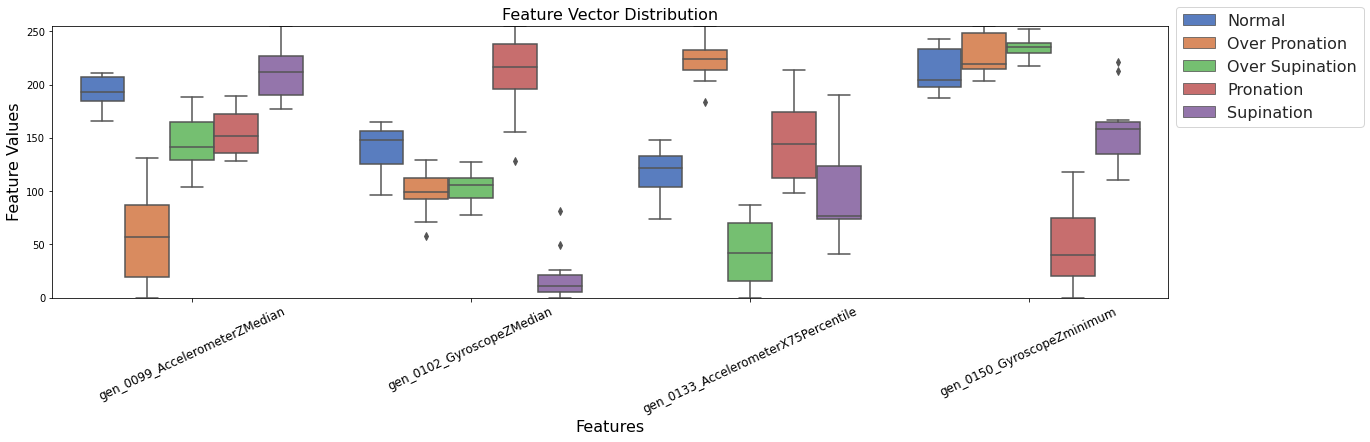

In [25]:
dsk.pipeline.visualize_features(fv_t)

### Creating Train and Test Datasets

In [26]:
x_train, x_test, x_validate, y_train, y_test, y_validate, class_map = dsk.pipeline.features_to_tensor(fv_t,test=0.0, validate=.2)

-----  Summary  -----
Class Map: {'Normal': 0, 'Over Pronation': 1, 'Over Supination': 2, 'Pronation': 3, 'Supination': 4}
Train:
 total:  53
 by class: [ 8. 12. 13. 12.  8.]
Validate:
 total:  14
 by class: [1. 4. 3. 3. 3.]
Train:
 total:  0
 by class: [0. 0. 0. 0. 0.]


In [27]:
x_train.shape

(53, 4)

### Creating the NN Aerchitecture Model in Tensorflow

In [28]:
from tensorflow.keras import layers
import tensorflow as tf

tf_model = tf.keras.Sequential()

tf_model.add(layers.Dense(11, activation='relu',kernel_regularizer='l1',input_shape=(x_train.shape[1],)))
tf_model.add(layers.Dropout(0.1))
tf_model.add(layers.Dense(8, activation='relu',input_shape=(x_train.shape[1],)))
tf_model.add(layers.Dropout(0.1))
tf_model.add(layers.Dense(y_train.shape[1], activation='softmax'))

# Fitting the Model
tf_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

tf_model.summary()
train_history = {'loss':[],'val_loss':[],'accuracy':[],'val_accuracy':[]}

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                55        
_________________________________________________________________
dropout (Dropout)            (None, 11)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 96        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


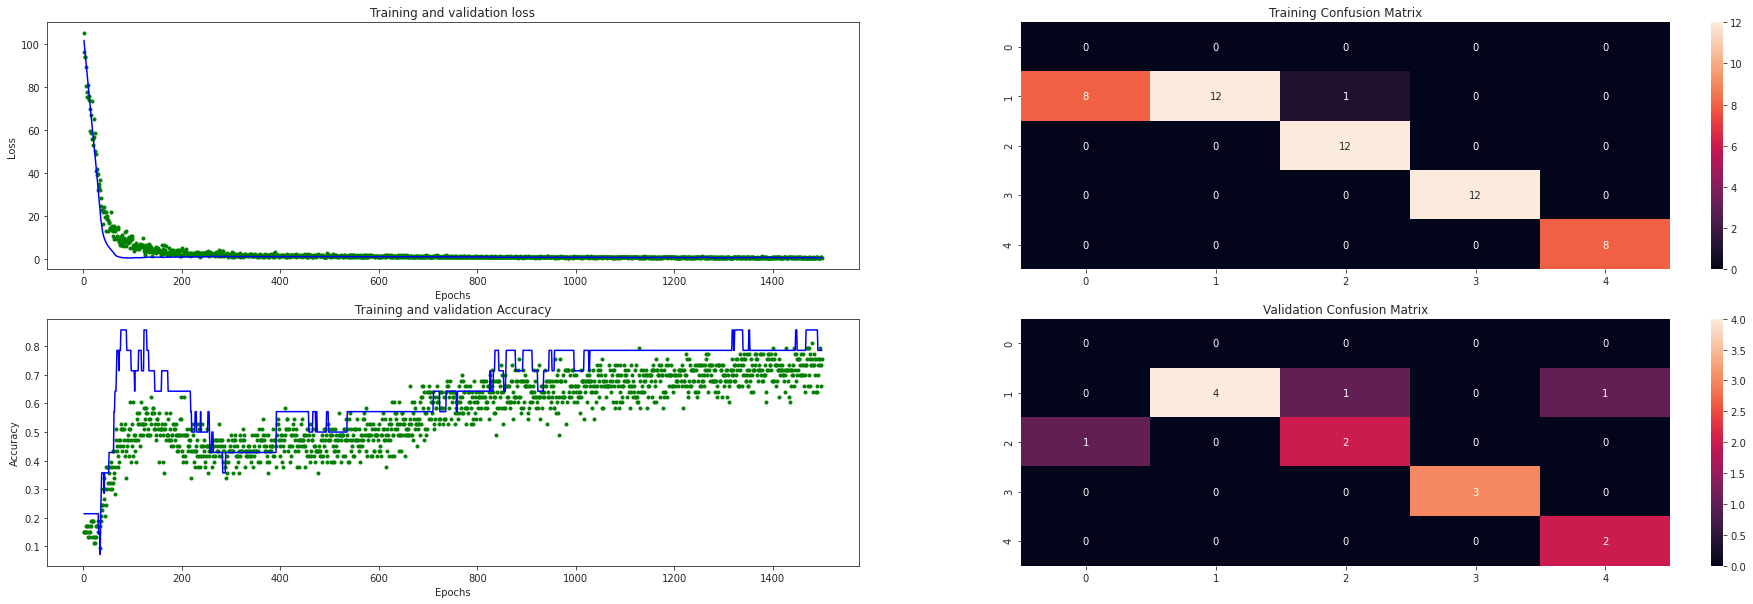

In [31]:
from IPython.display import clear_output
import sensiml.tensorflow.utils as sml_tf

num_iterations=10
epochs=100
batch_size=32

data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
shuffle_ds = data.shuffle(buffer_size=x_train.shape[0], reshuffle_each_iteration=True).batch(batch_size)

for i in range(num_iterations):
  history = tf_model.fit( shuffle_ds, epochs=epochs, batch_size=batch_size, validation_data=(x_validate, y_validate), verbose=0)

  for key in train_history:
    train_history[key].extend(history.history[key])

  clear_output()
  sml_tf.plot_training_results(tf_model, train_history, x_train, y_train, x_validate, y_validate) 

### Qualtizing the Model for TFLite

In [33]:
import numpy as np
def representative_dataset_generator():
  for value in x_validate:
    yield[np.array(value, dtype=np.float32, ndmin=2)]

In [34]:
# Unquantized Model
converter = tf.lite.TFLiteConverter.from_keras_model(tf_model)
tflite_model_full = converter.convert()
print("Full Model Size", len(tflite_model_full))

# Quantized Model
converter = tf.lite.TFLiteConverter.from_keras_model(tf_model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
converter.representative_dataset = representative_dataset_generator
tflite_model_quant = converter.convert()

print("Quantized Model Size", len(tflite_model_quant))

INFO:tensorflow:Assets written to: /tmp/tmpy8kneu2f/assets


INFO:tensorflow:Assets written to: /tmp/tmpy8kneu2f/assets


Full Model Size 2560
INFO:tensorflow:Assets written to: /tmp/tmpv12ki8l1/assets


INFO:tensorflow:Assets written to: /tmp/tmpv12ki8l1/assets


Quantized Model Size 2720


### Uploading the Model Back to SensiML Project

In [35]:
class_map_tmp = {k:v+1 for k,v in class_map.items()} #+1 because 0 is unknown

dsk.pipeline.set_training_algorithm("Load Model TF Micro",
                                    params={"model_parameters":{
                                            "tflite":sml_tf.convert_tf_lite(tflite_model_full)},
                                    "class_map":class_map_tmp,
                                    "estimator_type":"classification",
                                    "threshold":0.0,
                                    "train_history":train_history,
                                    "model_json":tf_model.to_json()})

dsk.pipeline.set_validation_method("Recall",params={})
dsk.pipeline.set_classifier("TF Micro", params={})
dsk.pipeline.set_tvo()
results, stats = dsk.pipeline.execute()


Executing Pipeline with Steps:

------------------------------------------------------------------------
 0.     Name: Continuous Final          		Type: query                    
------------------------------------------------------------------------
------------------------------------------------------------------------
 1.     Name: Windowing                 		Type: segmenter                
------------------------------------------------------------------------
------------------------------------------------------------------------
 2.     Name: Strip                     		Type: transform                
------------------------------------------------------------------------
------------------------------------------------------------------------
 3.     Name: generator_set             		Type: generatorset             
------------------------------------------------------------------------
------------------------------------------------------------------------
 4.     Name: s

In [30]:
results.summarize()

NameError: ignored

### Confusion Matrix

In [37]:
  model = results.configurations[0].models[0]
  model.confusion_matrix_stats['validation']

CONFUSION MATRIX:
              NormalOver PronationOver Supination PronationSupination       UNK       UNC   Support   Sens(%)
    Normal       9.0       0.0       0.0       0.0       0.0       0.0       0.0       9.0     100.0
Over Pronation       0.0      16.0       0.0       0.0       0.0       0.0       0.0      16.0     100.0
Over Supination       0.0       0.0      16.0       0.0       0.0       0.0       0.0      16.0     100.0
 Pronation       0.0       0.0       0.0      15.0       0.0       0.0       0.0      15.0     100.0
Supination       0.0       0.0       0.0       0.0      11.0       0.0       0.0      11.0     100.0

     Total         9        16        16        15        11         0         0        67          

PosPred(%)     100.0     100.0     100.0     100.0     100.0                        Acc(%)     100.0

In [38]:
model.knowledgepack.save("TFu_With_SensiML_Features")

Knowledgepack 'TFu_With_SensiML_Features' updated.


{'class_map': {'1': 'Normal',
  '2': 'Over Pronation',
  '3': 'Over Supination',
  '4': 'Pronation',
  '5': 'Supination'},
 'configuration_index': '0',
 'cost_summary': {'framework': {'flash': 0,
   'latency': 0,
   'sram': 0,
   'stack': 0},
  'model_size': 2593,
  'neurons': 2593,
  'pipeline': [{'flash': 0,
    'latency': 0.0,
    'name': 'Windowing',
    'sram': 0,
    'stack': 0,
    'type': 'segmenter'},
   {'flash': 0,
    'latency': 0.0,
    'name': 'Strip',
    'sram': 0,
    'stack': 0,
    'type': 'transform'},
   {'flash': 0,
    'latency': 0.0,
    'name': 'generator_set',
    'per_generator_costs': {'75th Percentile': {'flash': 0,
      'latency': 0.0,
      'name': '75th Percentile',
      'num_features': 1,
      'num_iterations': 1,
      'sram': 0,
      'stack': 0,
      'type': 'generator'},
     'Median': {'flash': 0,
      'latency': 0.0,
      'name': 'Median',
      'num_features': 2,
      'num_iterations': 2,
      'sram': 0,
      'stack': 0,
      'type': 'g

### Flashing

In [ ]:
!pip install qgrid

In [ ]:
!pip install bqplot

In [41]:
from sensiml import SensiML
from sensiml.widgets import *

dsk = SensiML()
FlashWidget(dsk, folder='pack').create_widget()

# Replace <Your Folder> with the directory folder path of your Knowledge Pack
# Note that the folder path needs double backslashes. See example:
# C:\\Users\\YourName\\Documents\\notebooks\\knowledgepacks

/usr/local/lib/python3.7/dist-packages/sensiml/client.py:112: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.
  mgc("%config Completer.use_jedi = False")
